# Exploratory Data Analysis(EDA) - Terrorism

Anurag Mahajan
GRIP Batch - July_22

Dataset - https://bit.ly/2TK5Xn5'

Task 4
  - As a security analyst, try to find out the zone of terrorism
  - What all Security issues and insight can be derive by performing EDA.

In [128]:
#importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import style

In [147]:
#Importing the dataset.

df_1 = pd.read_csv("globalterrorismdb_0718dist.csv",encoding ='cp1252', low_memory=False)

#df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding="ISO-8859-1", low_memory=False)

In [148]:
df_1.shape

(181691, 135)

In [154]:
#Renaming the important columns
df_1.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound',},inplace=True)
df_1 = df_1[['Year','Month','day', 'Country','State','Region','City','latitude','longitude','Attacktype','kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [133]:
df_1.isnull().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

In [134]:
#creating casualties column
df_1['Casualities'] = df_1['kill'].fillna(0) + df_1['Wound'].fillna(0)

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'kill'}>],
       [<AxesSubplot:title={'center':'Wound'}>,
        <AxesSubplot:title={'center':'Casualities'}>, <AxesSubplot:>]],
      dtype=object)

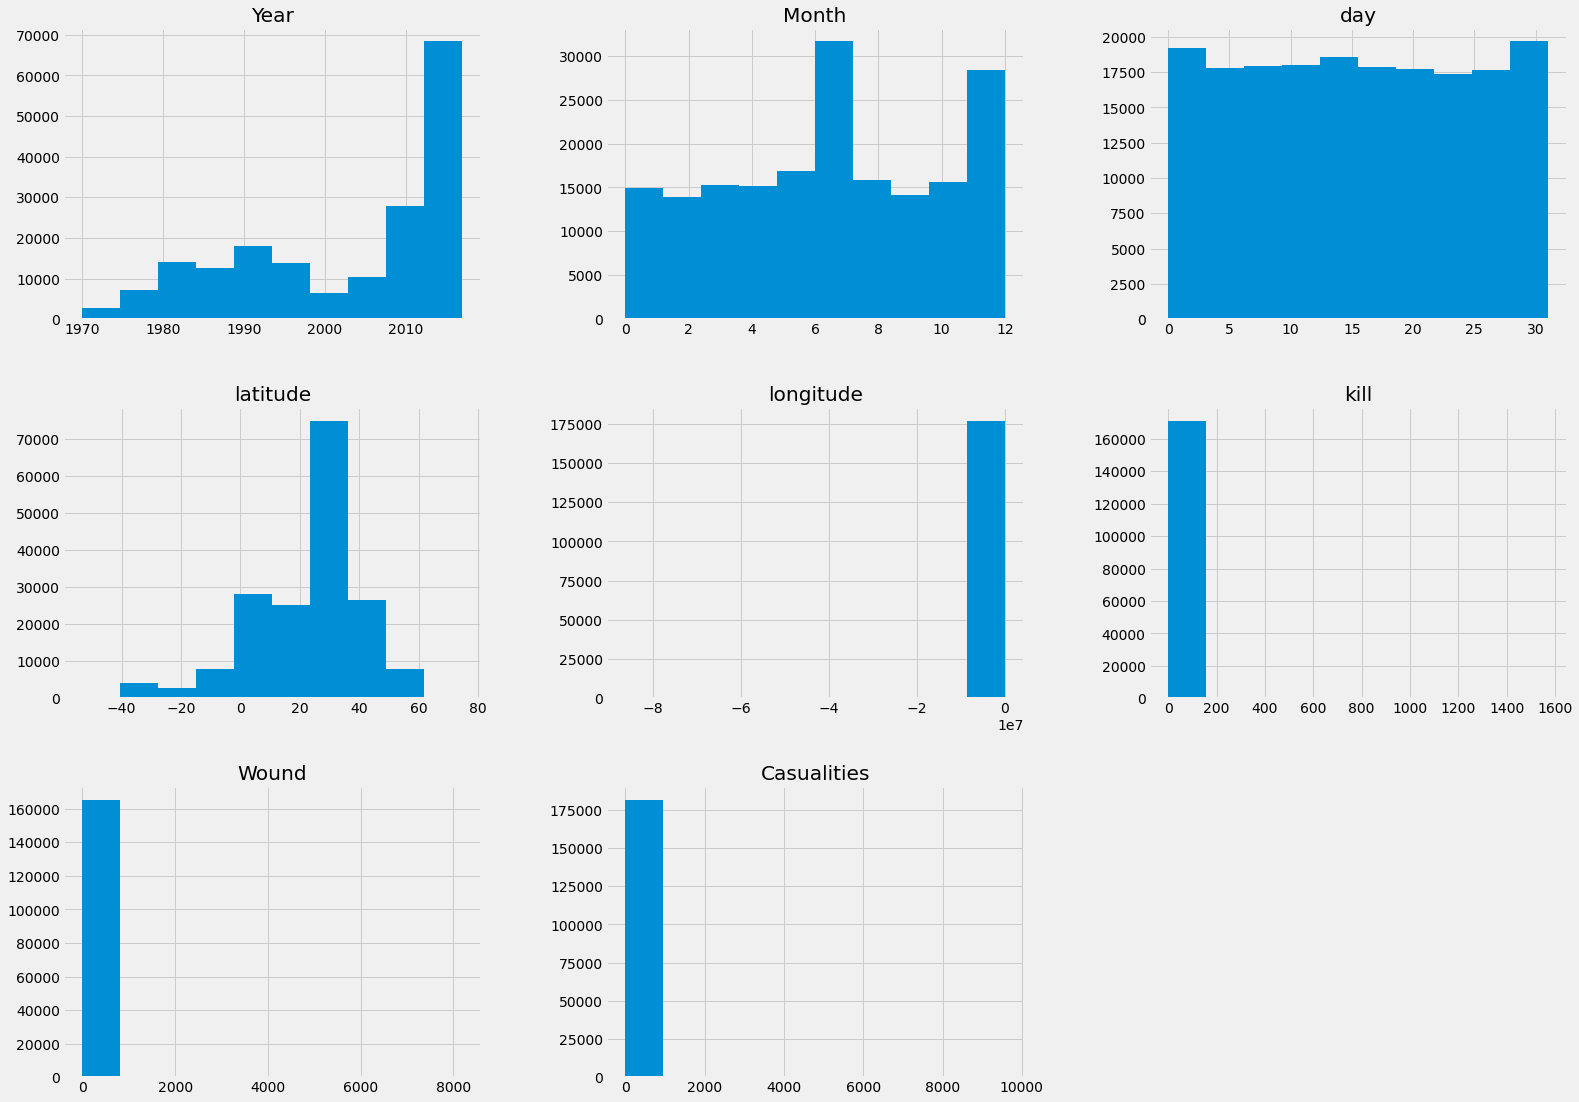

In [135]:
#plotting columns
df_1.hist(figsize=(24,18))

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


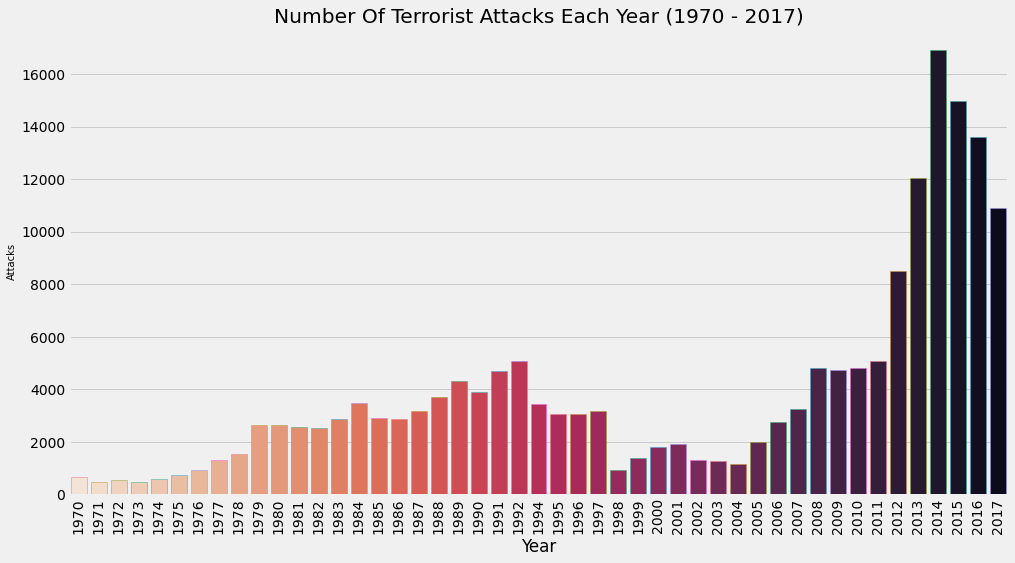

In [164]:
#Total number of Attacks in respective year
from matplotlib import style
style.use("fivethirtyeight")


sns.countplot(df_1["Year"], palette='rocket_r', edgecolor = sns.color_palette("husl", 8))
plt.xticks(rotation = 90)
plt.ylabel("Attacks", size ='10')
plt.title('Number Of Terrorist Attacks Each Year (1970 - 2017)')
plt.show()
matplotlib.rcParams['figure.figsize'] = (15,8)

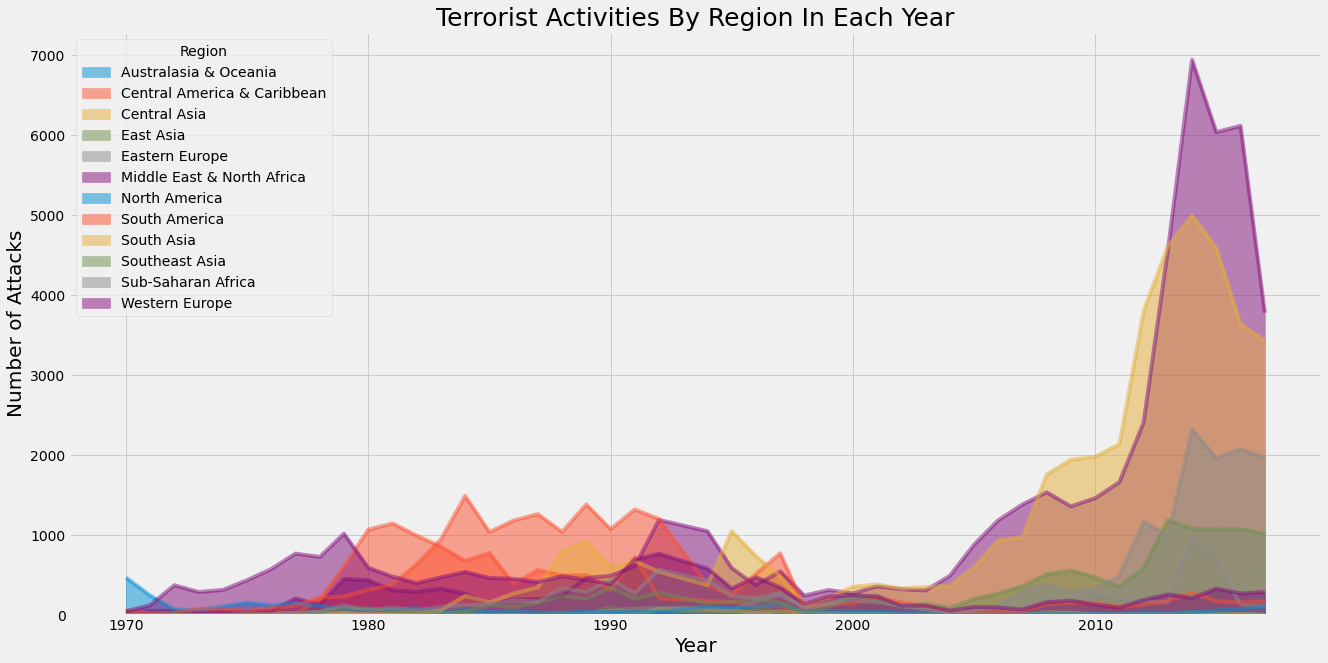

In [137]:
# Terrorist activities in Different regions vs year
pd.crosstab(df_1.Year, df_1.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


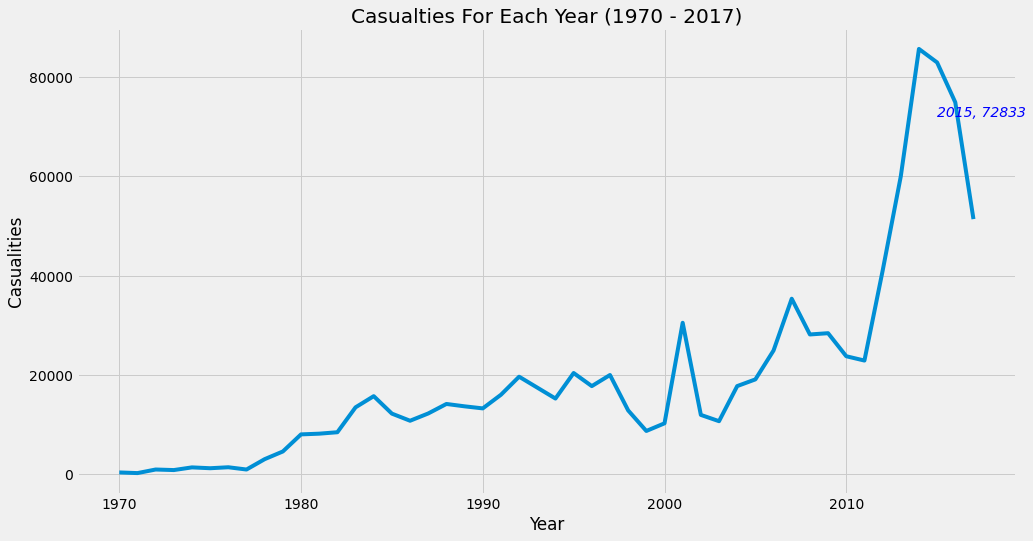

In [138]:
year_wise_casualties = df_1.groupby('Year')['Casualities'].sum()
ax = sns.lineplot(year_wise_casualties.index, year_wise_casualties)
plt.title('Casualties For Each Year (1970 - 2017)')

ax.text(2015, 72833, "2015, 72833", verticalalignment='center',
                fontstyle = 'italic', fontweight = 100, color = 'b')
plt.show()

In [139]:
cntry = list(df_1['Country'].value_counts().index)
atkcnt = list(df_1['Country'].value_counts())
d = {"Country" : cntry, "Attacks": atkcnt}
d = pd.DataFrame(d)
d.head(10)

,Country,Attacks
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


In [140]:
d.tail(10)

,Country,Attacks
195,Vatican City,1
196,Falkland Islands,1
197,St. Lucia,1
198,North Korea,1
199,New Hebrides,1
200,International,1
201,Wallis and Futuna,1
202,South Vietnam,1
203,Andorra,1
204,Antigua and Barbuda,1


In [141]:
# Attacks by different groups
df_1.Group.value_counts()[1:10]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group, dtype: int64

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


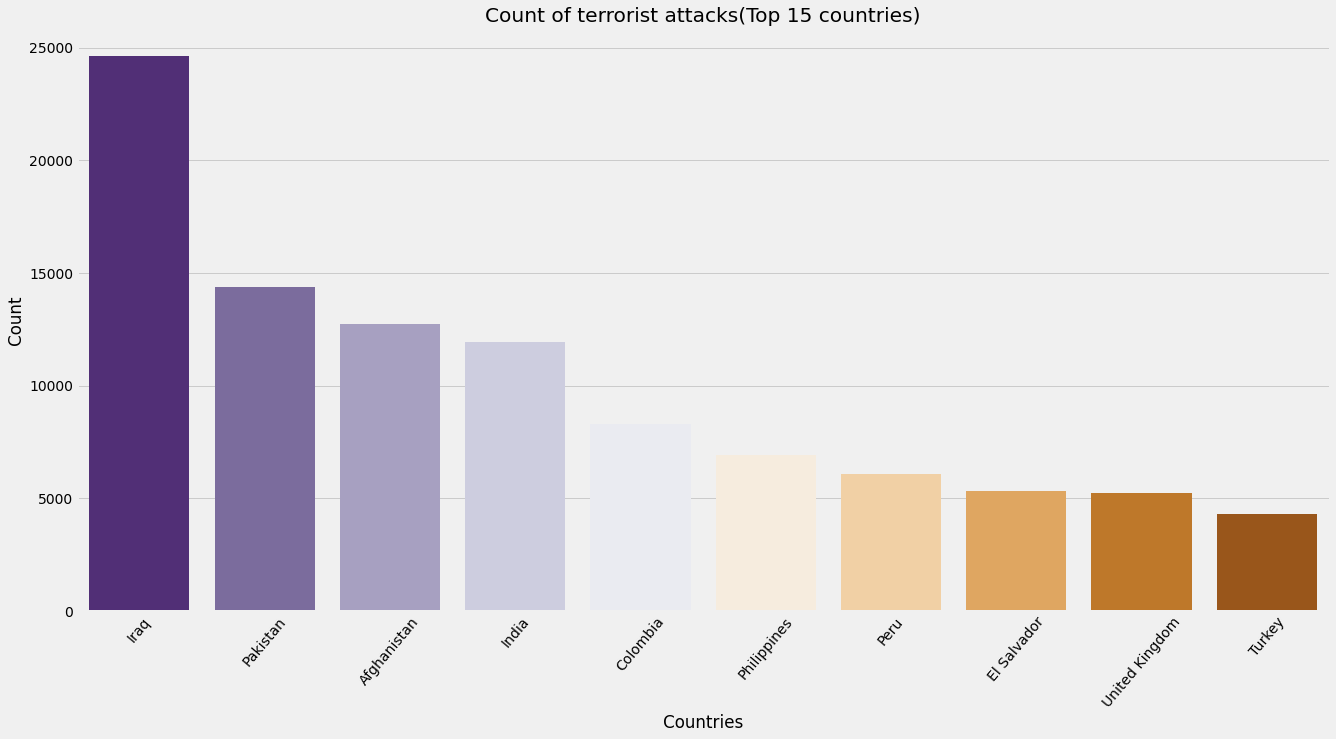

In [142]:
plt.subplots(figsize=(20,10))
sns.barplot(df_1['Country'].value_counts()[:10].index, df_1['Country'].value_counts()[:10].values,palette='PuOr_r')
plt.title('Count of terrorist attacks(Top 15 countries)')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

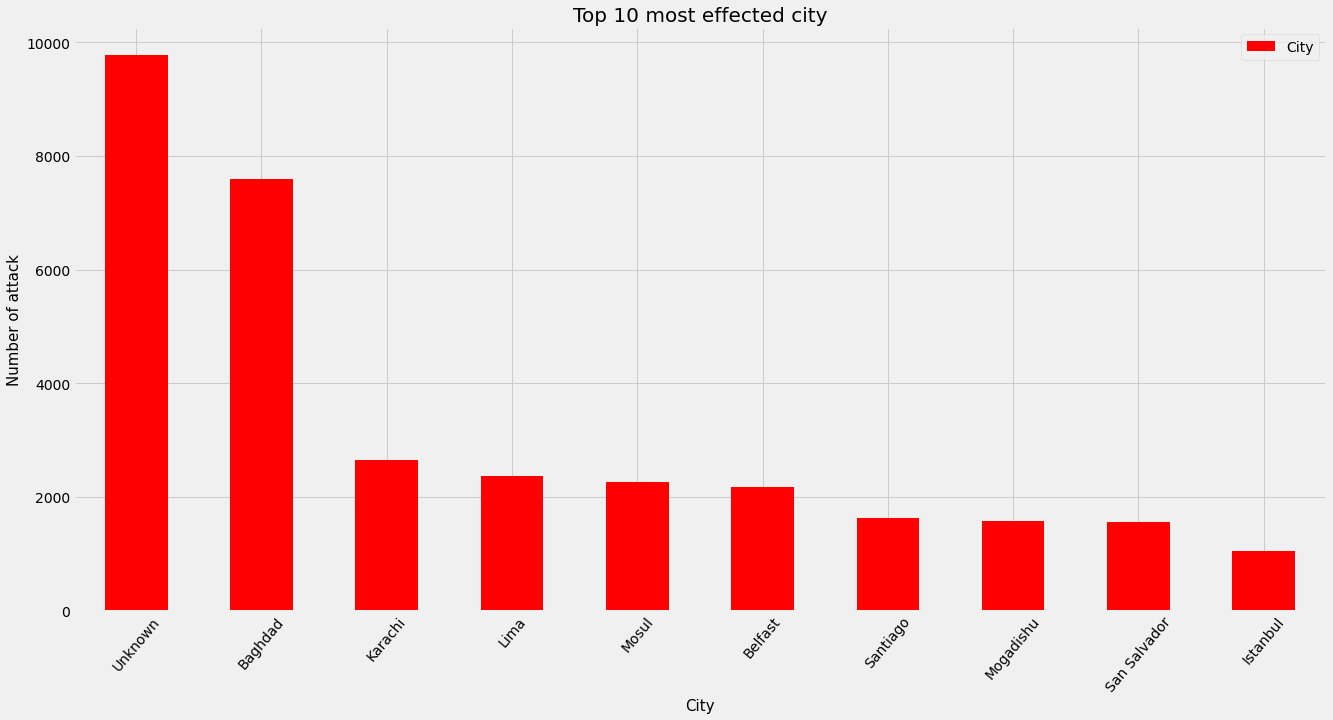

In [143]:

df_1['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='red')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.show()

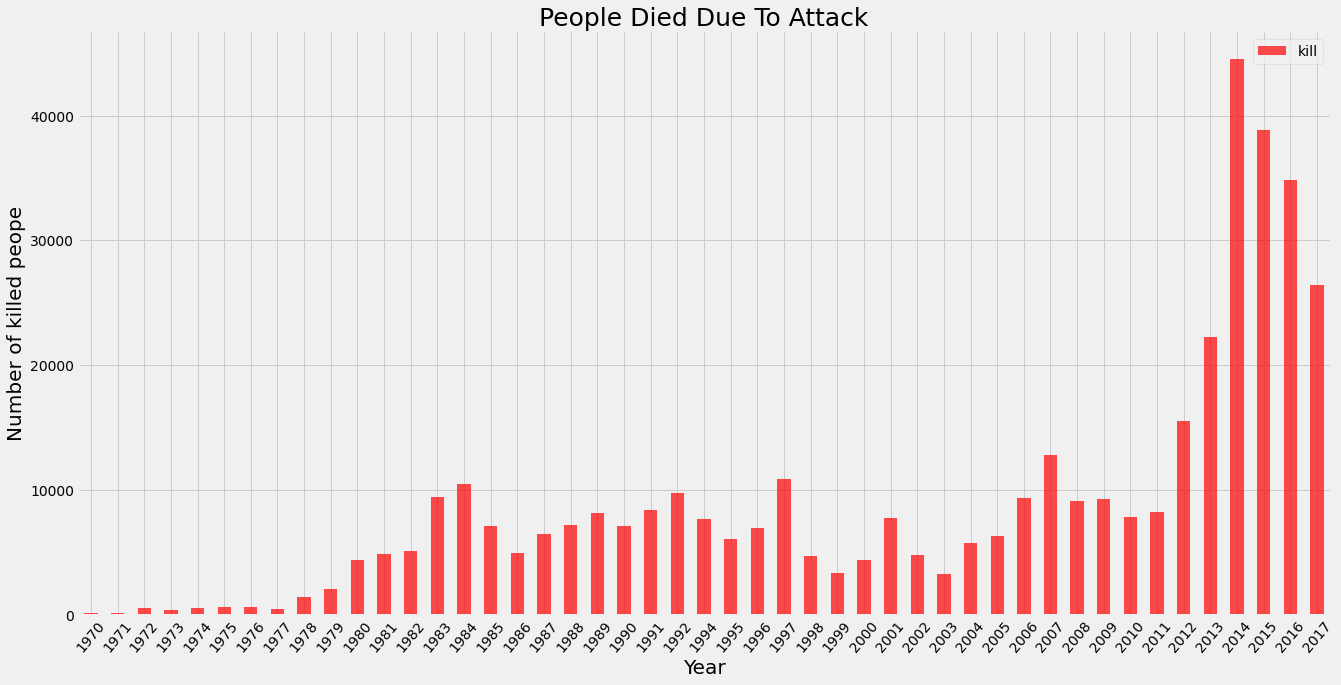

In [144]:
df_1 = df_1[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df_1.plot(kind='bar',alpha=0.7,ax=ax4, color='red')
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=25)
plt.ylabel("Number of killed peope",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

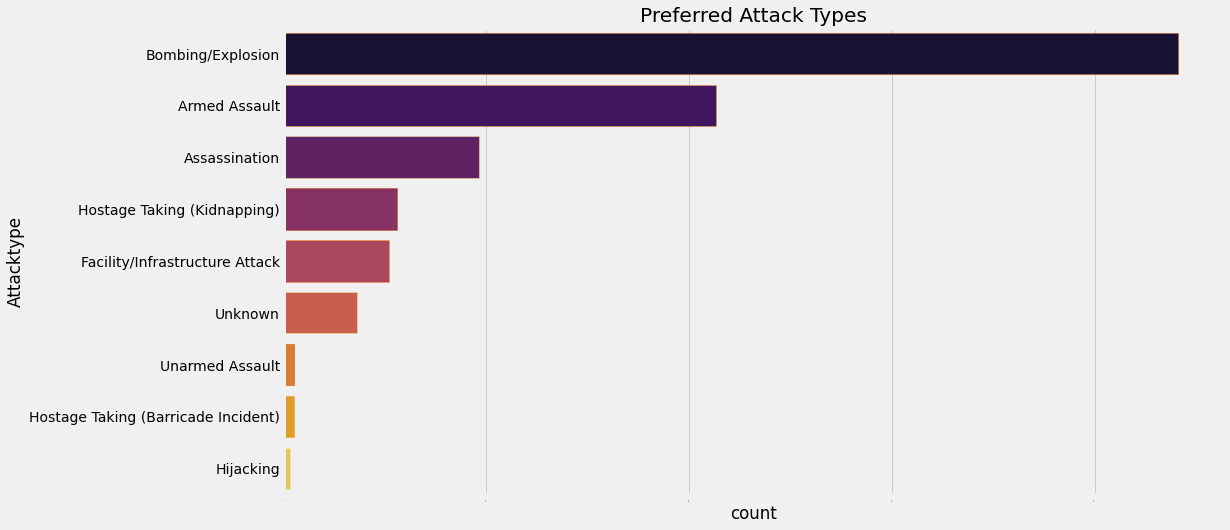

In [152]:
from matplotlib import style
style.use("fivethirtyeight")


sns.countplot(y = df_1["Attacktype"], palette='inferno', edgecolor = sns.color_palette("YlOrBr_r", 3), order=df_1['Attacktype'].value_counts().index)
plt.xticks(rotation = 90, size='1')
plt.title('Preferred Attack Types')
plt.show()

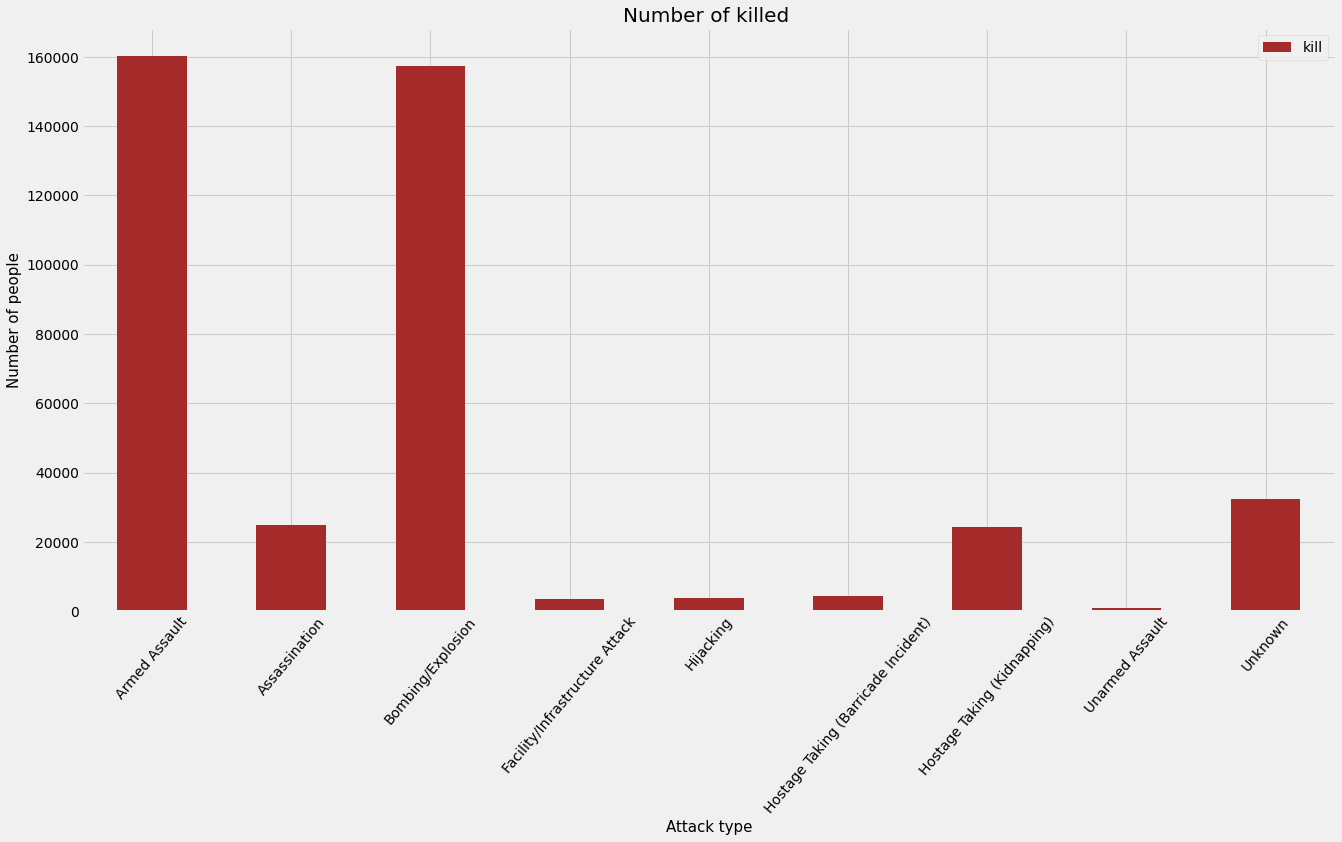

In [159]:
df_1[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['brown'])
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

# Terrorist group

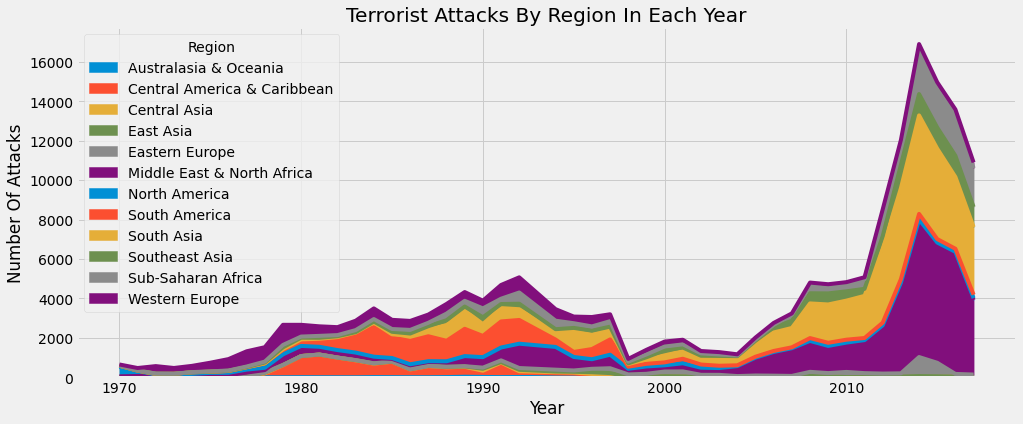

In [160]:
pd.crosstab(df_1.Year, df_1.Region).plot(kind='area', figsize=(15,6))
plt.title('Terrorist Attacks By Region In Each Year')
plt.ylabel("Number Of Attacks")
plt.show()

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


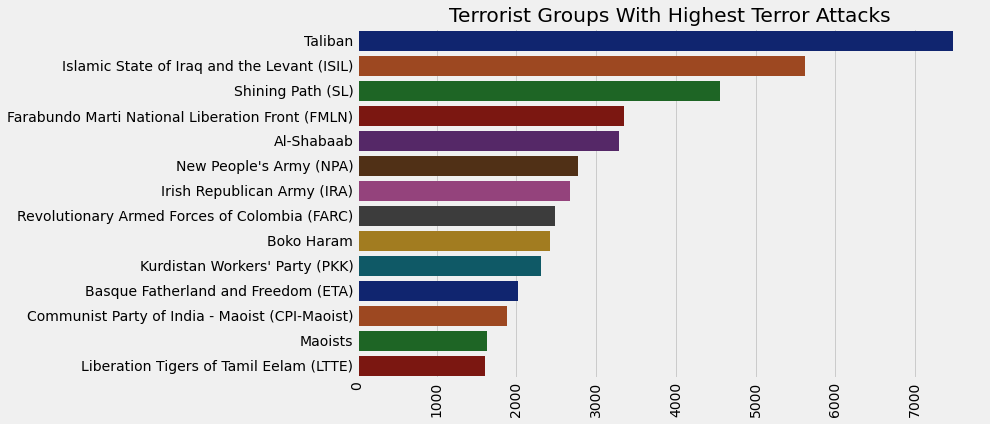

In [161]:
sns.barplot(df_1['Group'].value_counts()[1:15].values, df_1['Group'].value_counts()[1:15].index, palette=('dark'))
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.title('Terrorist Groups With Highest Terror Attacks')
plt.show()

-> Taliban is the group with highest number of terrorist attacks

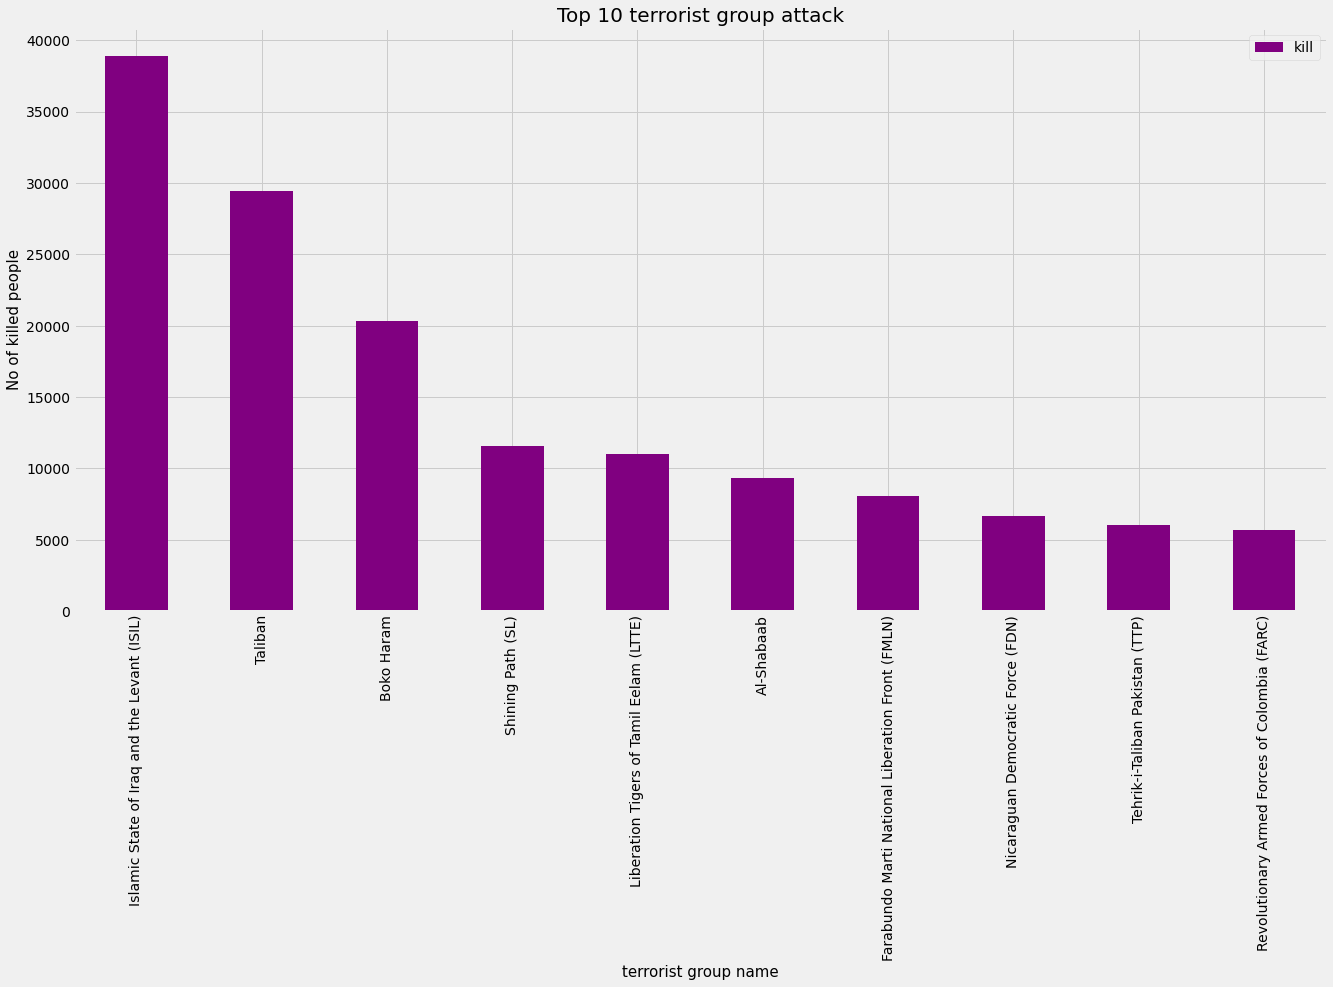

In [162]:
df_1[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='purple',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("No of killed people",fontsize=15)
plt.show()

In [163]:
df=df_1[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

C:\Users\User\AppData\Local\Temp\ipykernel_23324\3550009099.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)


,Group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


In [ ]:
#